# PCA (Principal Component Analysis)

## PCA with Python

In [39]:
import sys
import os

current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', '..', 'src')

sys.path.append(src_dir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing.kpca import rbf_kernel_pca
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
from utils.plotDecisionRegions import plot_decision_regions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [40]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [41]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8427 2.416  1.5485 0.9612 0.8417 0.6621 0.5183 0.3465 0.3131 0.1075
 0.2136 0.1536 0.1809]


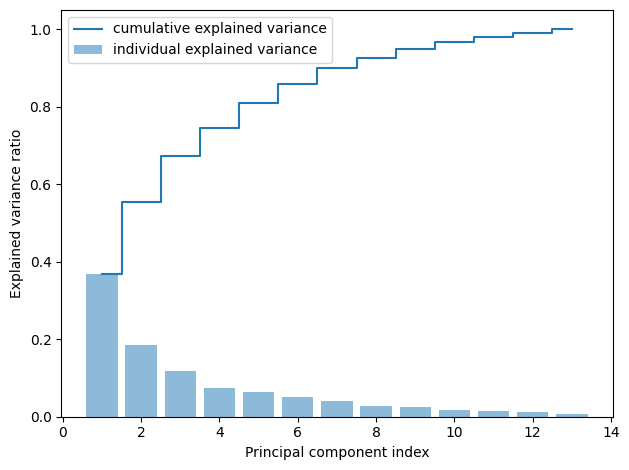

In [43]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # Variance explained ratio of each eigenvalue
cum_var_exp = np.cumsum(var_exp) # Cumulative sum of variance explained ratio

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')  
plt.tight_layout()
plt.show()

In [44]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

Matrix W:
 [[-0.1372  0.503 ]
 [ 0.2472  0.1649]
 [-0.0255  0.2446]
 [ 0.2069 -0.1135]
 [-0.1544  0.2897]
 [-0.3938  0.0508]
 [-0.4174 -0.0229]
 [ 0.3057  0.0905]
 [-0.3067  0.0084]
 [ 0.0755  0.5498]
 [-0.3261 -0.2072]
 [-0.3686 -0.249 ]
 [-0.2967  0.3802]]


In [45]:
X_train_std[0].dot(w)

array([2.383 , 0.4546])

In [46]:
X_train_pca = X_train_std.dot(w)

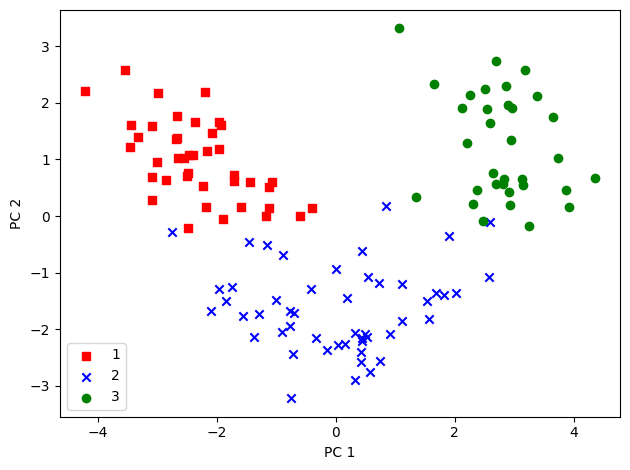

In [47]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/Users/brandonfeist/git/ml/python-machine-learning-book/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/preprocessing/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


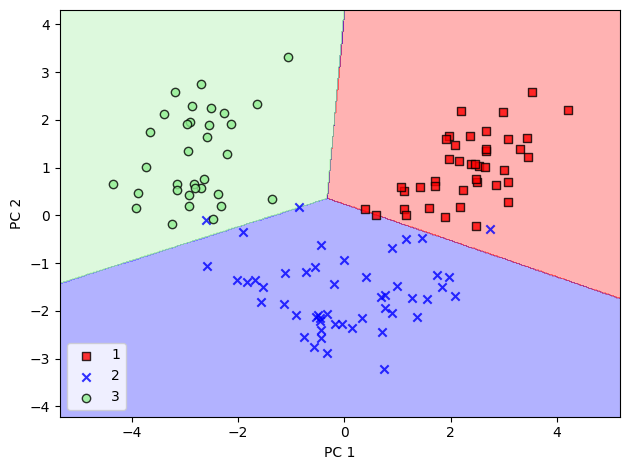

In [48]:
# Initialize PCA transformer
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# Dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Fit the logistic regression model on the reduced dataset
lr.fit(X_train_pca, y_train)

# Plot the decision regions
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

As we can see, the data we composed with the scikit PCA solver and the data we processed manually are the same, except for the fact that they are mirrored. The data being mirrored is not an error, but is a product in how the eigenvectors are calculated. The eigenvectors are calculated in a way that the data is mirrored, but the eigenvectors are still correct. If we multiply the data by -1, the data will be the same as the data we processed manually.

/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/preprocessing/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


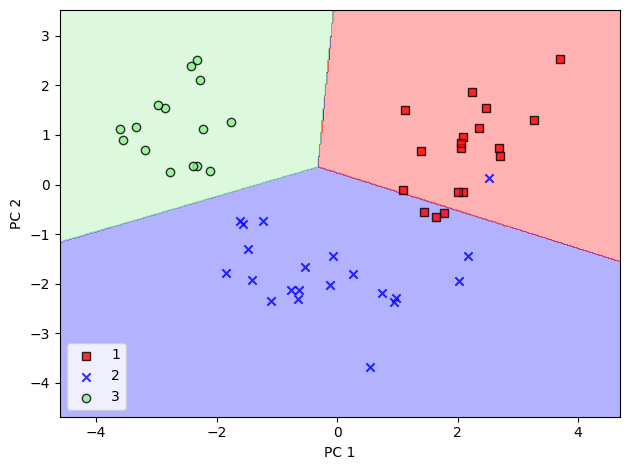

In [49]:
# Plot the decision regions for the test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [50]:
# Explained variance ratio
pca = PCA(n_components=None) # n_components=None means that all principal components are kept
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

## Learnings
PCA is an unsupervised algorithm that allows us to find features with the highest variance and then use that information to reduce the side of a dataset to the most important features. This is useful when we are working with a dataset that has a high dimensionality which can cause issues (ie. overfitting from the curse of dimensionality, computational complexity, etc.). The power of PCA being able to accuratly choose the highest variance features is due the power behind eigenvalues and eigenvectors. Eigenvectors are the directions of the data that have the highest variance and eigenvalues are the magnitude of the variance in that direction. By using these two concepts, PCA is able to sort features by their variance which enables us to analyze where variance falls off and where we can reduce the size of the dataset.

### Math Side Note
Although I did take a class in linear algebra in college, I feel like this shines a light on the fact that it is probably a good idea to review these concepts after I am done with this book.

# Linear Discriminant Analysis (LDA)

## LDA with Python

In [51]:
np.set_printoptions(precision=4)
mean_vecs = []

for label in range(1, 4):
  mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
  print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [52]:
# Within-class scatter matrix
d = 13 # Number of features
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.zeros((d, d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [53]:
# As we can see, class labels are not uniformly distributed
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [54]:
d = 13 # Number of features
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train == label].T)
  S_W += class_scatter

print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [55]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # Number of features
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
  n = X_train[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1)
  mean_overall = mean_overall.reshape(d, 1)
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [56]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalues in decreasing order:

349.617808905994
172.76152218979382
2.5481445655158925e-14
2.5481445655158925e-14
2.338176411255993e-14
2.338176411255993e-14
1.4368252223521912e-14
1.4368252223521912e-14
6.3737818001526064e-15
4.514488639250919e-15
4.514488639250919e-15
2.5784328775550555e-16
0.0


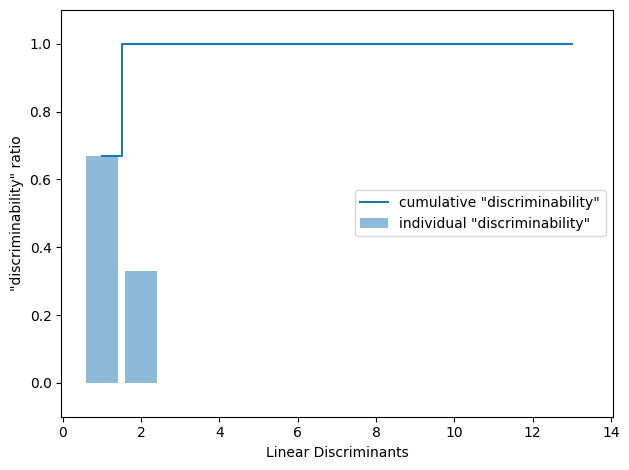

In [57]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [58]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


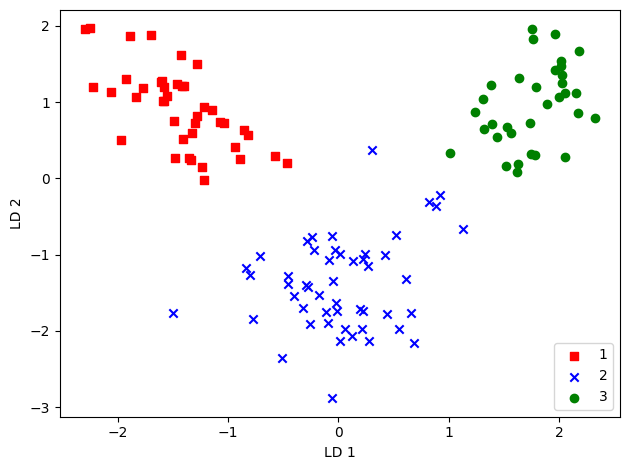

In [59]:
# Projecting samples onto the new feature space
X_train_lda = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1] * (-1), c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## LDA with Scikit-Learn

/Users/brandonfeist/git/ml/python-machine-learning-book/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/preprocessing/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


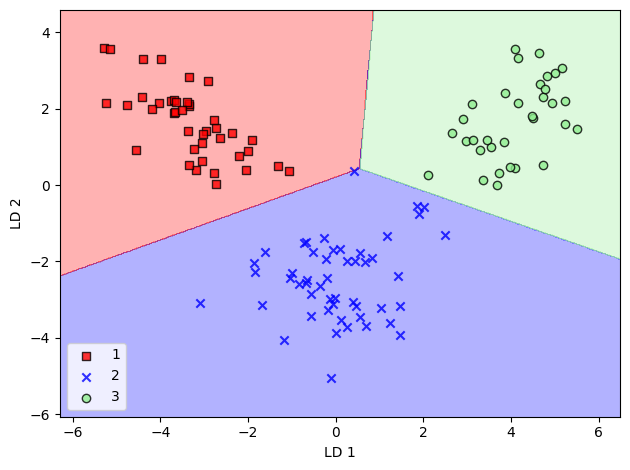

In [60]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/preprocessing/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


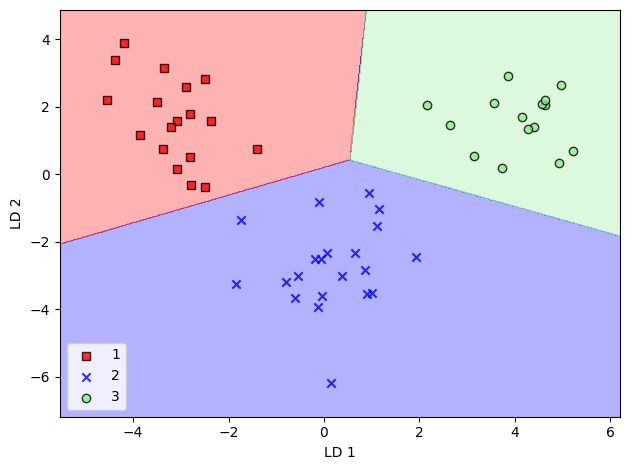

In [61]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Learnings

LDA is a supervised dimensionality reduction, that is aware of the feature labeling while reducing dimensionality.

TODO: Take time to understand the math behind LDA

# Kernel Principal Component Analysis

## Kernel PCA with Python

## Seperating Moons

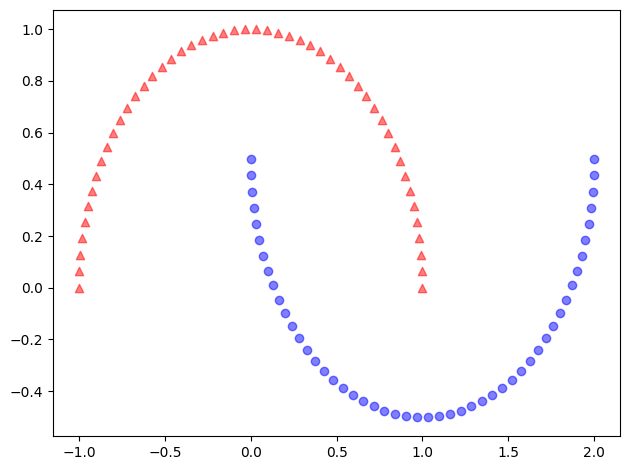

In [62]:
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

### Reducing dimensionality with regular PCA

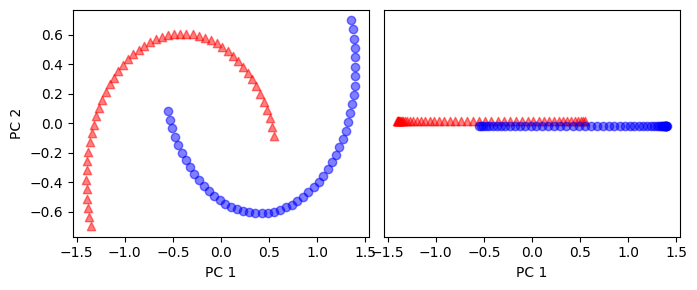

In [63]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.tight_layout()
plt.show()

### Reducing dimensionality with Kernel PCA

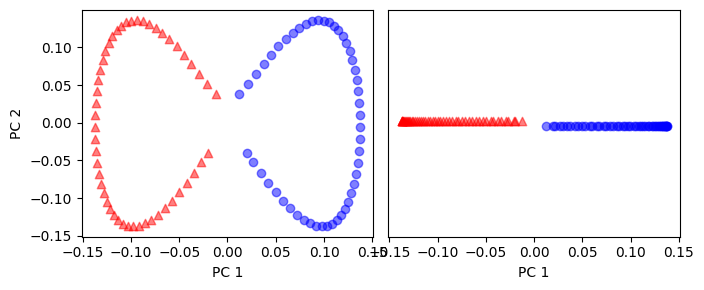

In [64]:
alphas, lambas = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(alphas[y==0, 0], alphas[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(alphas[y==1, 0], alphas[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(alphas[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(alphas[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.tight_layout()
plt.show()

## Seperating Concentric Circles

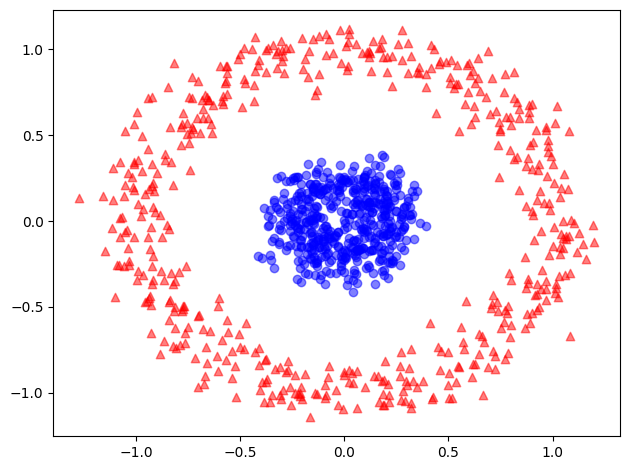

In [65]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

### Reducing dimensionality with regular PCA

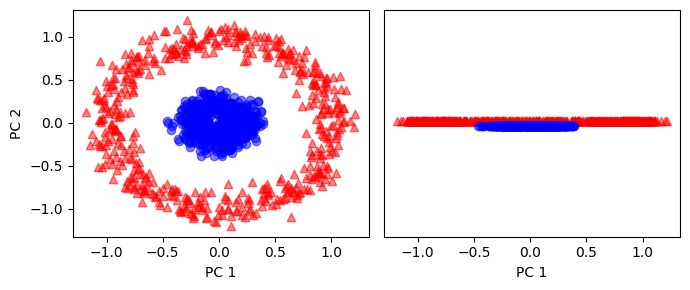

In [66]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.tight_layout()
plt.show()

### Reducing dimensionality with Kernel PCA

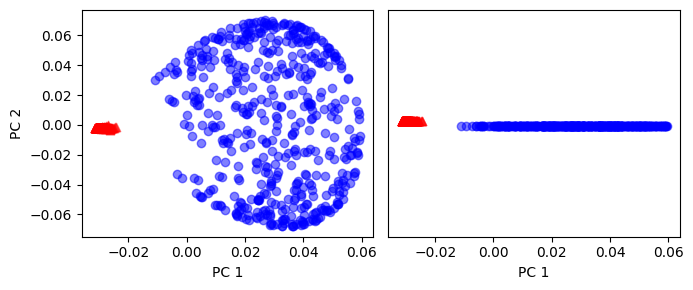

In [67]:
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(alphas[y == 0, 0], alphas[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(alphas[y == 1, 0], alphas[y == 1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(alphas[y == 0, 0], np.zeros((500, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(alphas[y == 1, 0], np.zeros((500, 1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.tight_layout()
plt.show()

### Projecting new data points

In [68]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

x_new = X[25]
print(x_new)

x_proj = alphas[25] # Original projection
print(x_proj)

def project_x(x_new, X, gamma, alphas, lambdas):
  pair_dist = np.array([np.sum((x_new - row) ** 2) for row in X])
  k = np.exp(-gamma * pair_dist)
  return k.dot(alphas / lambdas)

x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print(x_reproj)

[1.8713 0.0093]
[0.0788]
[0.0788]


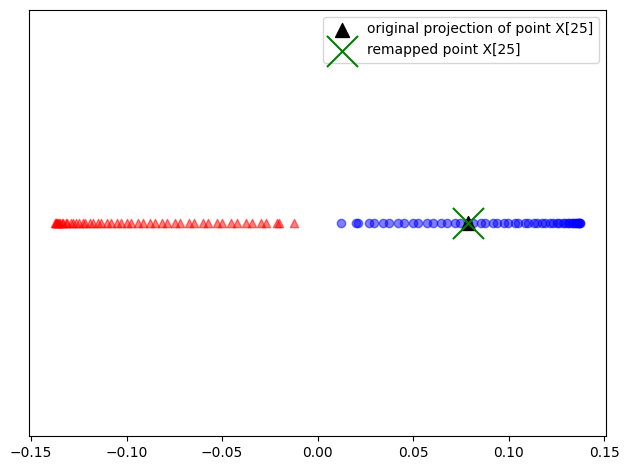

In [69]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

## Kernal PCA with Scikit-Learn

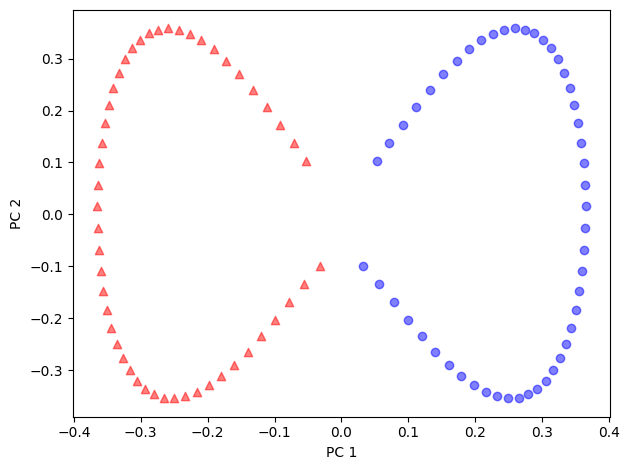

In [70]:
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()

## Learnings

Kernal PCA draws similarities from the learnings in the classifier chapter where we learned about the kernel trick. KPCA allows us to take non-linear data, transform it to a higher dimensional space, then reduce it back down to a lower dimensional space while at the same time making it linearly separable.

TODO: While at a very high level, I understand a bit of what's going on, I feel that my understanding at a lower level and the math behind it is lacking. I think that I need to review the math behind KPCA to get a better understanding of what's going on.
It is also advised to look into the scikit-learn implementation of KPCA here: https://scikit-learn.org/stable/modules/manifold.html